# Notes on Chapter 5 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

Basic SVC example with Iris dataset

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length and width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

In [3]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

Let's make a simple plotting function to see the decision boundary (similar to the plots the author shows)

In [4]:
def plot_2D_classifier(m, X, y):
    axis_mins = np.min(X, axis=0)
    axis_maxs = np.max(X, axis=0)
    axis_range = axis_maxs - axis_mins
    
    axis_padding = 0.2 * axis_range
    axis_mins = -axis_padding + axis_mins
    axis_maxs = axis_padding + axis_maxs
    axis_range = 2*axis_padding + axis_range
    
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlim(axis_mins[0], axis_maxs[0])
    plt.ylim(axis_mins[1], axis_maxs[1])
    
    uv = np.linspace(axis_mins, axis_maxs, 300)
    grid_u, grid_v = np.meshgrid(uv[:,0], uv[:,1])
    grid_X = np.hstack(
        (grid_u.flatten()[:,np.newaxis],
         grid_v.flatten()[:,np.newaxis]))
    grid_decision = m.decision_function(grid_X).reshape(grid_u.shape)
    grid_predict = m.predict(grid_X).reshape(grid_u.shape)
    plt.contour(grid_u, grid_v, grid_decision, alpha=0.1)
    plt.contour(grid_u, grid_v, grid_predict, 1)

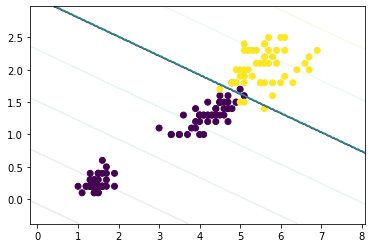

In [5]:
plot_2D_classifier(svm_clf, X, y)

Non-linear example.  We start by loading a synthetic non-linear dataset.

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

This obviously will not work well with a simple linear model:

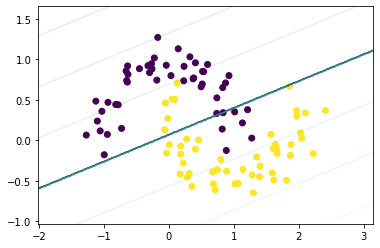

In [7]:
svm_clf.fit(X, y)
plot_2D_classifier(svm_clf, X, y)

Next, we fit by adding polynomial features.

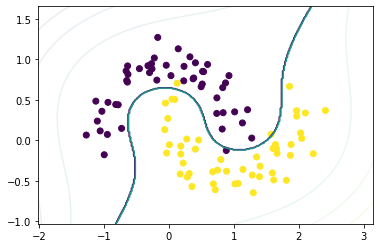

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000, tol=1e-2))
])

poly_svm.fit(X, y)
plot_2D_classifier(poly_svm, X, y)

We potentially can have better performance with polynomial kernels:

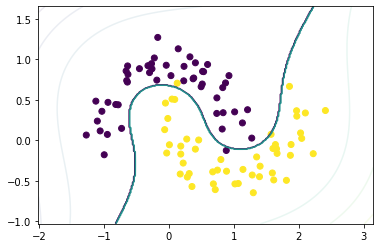

In [9]:
from sklearn.svm import SVC
polyk_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5, max_iter=5000))
])

polyk_svm.fit(X, y)
plot_2D_classifier(polyk_svm, X, y)

We can also try radial basis functions:

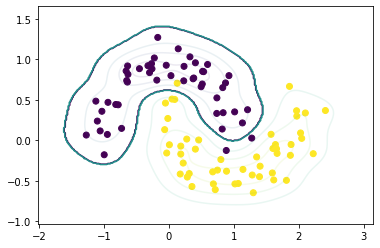

In [10]:
rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001, max_iter=5000))
])

rbf_svm.fit(X, y)
plot_2D_classifier(rbf_svm, X, y)

SVMs also work for regression, of course.

In [11]:
np.random.seed(42)
X = np.random.uniform(0., 2., (100,1))
y = (2*X + 3 + np.random.normal(0., 1., X.shape))[:,0]

def plot_1D_regressor(model, X, y):
    X_hat = np.linspace(np.min(X), np.max(X), 500)[:, np.newaxis]
    y_hat = model.predict(X_hat)
    plt.scatter(X, y)
    plt.plot(X_hat, y_hat)

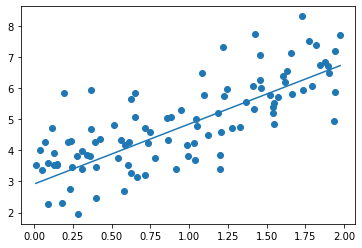

In [12]:
from sklearn.svm import LinearSVR

svr = LinearSVR(epsilon=1.)
svr.fit(X, y)
plot_1D_regressor(svr, X, y)

Polynomial features are also supported.

In [13]:
X = np.random.uniform(-1., 1., (100,1))
y = (0.5*X**2 + 3 + np.random.normal(0., 0.1, X.shape))[:,0]

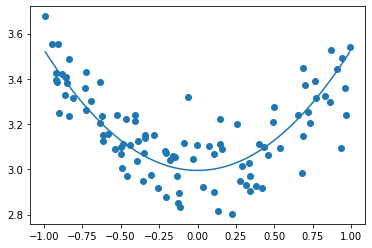

In [14]:
np.random.seed(42)
from sklearn.svm import SVR

svr = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svr.fit(X, y)
plot_1D_regressor(svr, X, y)

## Exercises

### 5.1

Maximizing the width of the decision boundary

### 5.2

The points limiting further expansion of the decision boundary

### 5.3

So that the width in the decision boundary is sensible for each dimension.

### 5.4

Not directly, but the distance from the center of the street and the width of the street can be used to construct a second model for confidence/probability.

### 5.5

Only if you need to use the kernel trick; otherwise it is likely more efficient to use the primal form.

### 5.6

Increase both gamma and/or C.

### 5.7

$$
\begin{align}
H_{i,j} &= \cases{1,&if $i = j$ and $i \ne 0$;\cr0,&otherwise.\cr} \\
f_i &= 0 \\
A_{i,j} &= \cases{1,&when $j = n + 1$ where $n$ is the number of features;\cr X_{i,j},&otherwise.\cr}
\end{align}
$$

### 5.8

First we generate some test data:

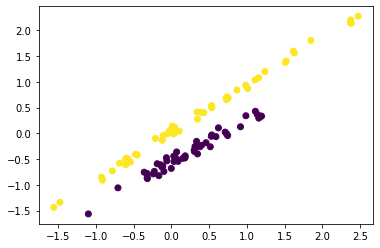

In [15]:
X,y = datasets.make_classification(n_features=2, n_redundant=0, n_repeated=0, class_sep=0.3, random_state=42, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y)

First the linear SVC:

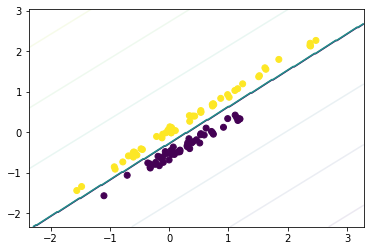

In [16]:
linear_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

linear_svc.fit(X, y)
plot_2D_classifier(linear_svc, X, y)

Next, the standard SVC forced to use the linear model:

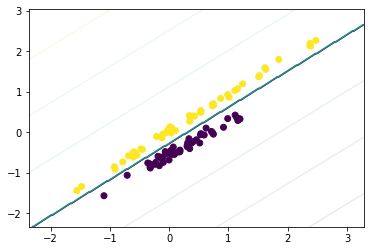

In [17]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="poly", degree=1))
])

svc.fit(X, y)
plot_2D_classifier(svc, X, y)

Finally the SGDClassifier

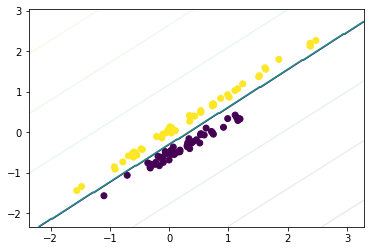

In [18]:
from sklearn.linear_model import SGDClassifier
sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier())
])

sgd.fit(X, y)
plot_2D_classifier(sgd, X, y)

### 5.9

First, load the MNIST dataset

In [19]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

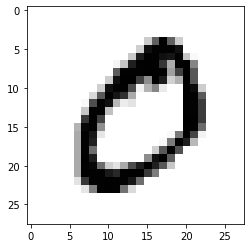

In [20]:
plt.imshow(X[1].reshape((28,28)), cmap="binary")

Split the data into test and training data

In [21]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

Use a subset of the training data for faster prototyping

In [22]:
X_minitrain = X_train[:1500]
y_minitrain = y_train[:1500]

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def minst_svc(kernel, **params):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel=kernel, **params))
    ])

In [24]:
cross_val_score(minst_svc("poly", degree=8), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.168, 0.166, 0.164])

In [25]:
cross_val_score(minst_svc("poly", degree=12), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.144, 0.166, 0.148])

In [26]:
cross_val_score(minst_svc("poly", degree=6), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.198, 0.188, 0.18 ])

In [27]:
cross_val_score(minst_svc("poly", degree=4), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.298, 0.262, 0.294])

In [28]:
cross_val_score(minst_svc("poly", degree=2), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.836, 0.796, 0.802])

In [29]:
cross_val_score(minst_svc("poly", degree=1), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.876, 0.862, 0.852])

In [30]:
cross_val_score(minst_svc("poly", degree=1, C=10), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.852, 0.846, 0.846])

In [31]:
cross_val_score(minst_svc("poly", degree=1, C=0.1), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.792, 0.762, 0.752])

In [32]:
cross_val_score(minst_svc(kernel='rbf', gamma=1, C=1, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.118, 0.118, 0.118])

In [33]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=1, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.862, 0.846, 0.818])

In [34]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.0001, C=1, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.794, 0.756, 0.746])

In [35]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=10, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.85 , 0.844, 0.834])

In [36]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=100, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.85 , 0.844, 0.834])

In [37]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=0.1, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.662, 0.634, 0.66 ])

In [38]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=0.5, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.842, 0.83 , 0.792])

In [39]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=2, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.858, 0.854, 0.828])

In [40]:
cross_val_score(minst_svc(kernel='rbf', gamma=0.001, C=0.8, max_iter=5000), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

array([0.86 , 0.838, 0.816])

In [44]:
def minst_lsvc(**params):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=1, loss='hinge'))
    ])

In [45]:
cross_val_score(minst_lsvc(C=1, loss='hinge'), X_minitrain, y_minitrain, cv=3, scoring="accuracy")

/home/kms15/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kms15/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.752, 0.77 , 0.76 ])

In [46]:
svc = minst_svc("poly", degree=1)
svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(degree=1, kernel='poly'))])

In [47]:
from sklearn.metrics import accuracy_score
y_test_predict = svc.predict(X_test)
accuracy_score(y_test, y_test_predict)

0.9452

### 5.10

We first import the California housing dataset (see chapter 2)...

In [4]:
import tarfile
import urllib
from pathlib import Path
import shutil
from tempfile import TemporaryFile
import pandas as pd

housing_dataset_path = Path('datasets') / 'housing' / 'housing.csv'

def fetch_housing_data(
    source_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz',
    dest_path = housing_dataset_path
    ):
    # create the destination directory, if needed
    dest_path.parent.mkdir(parents=True, exist_ok=True)
    
    # download the compressed data into a temporary file
    with TemporaryFile() as tempfile:
        with urllib.request.urlopen(source_url) as download:
            shutil.copyfileobj(download, tempfile)

        # extract the compressed data
        tempfile.seek(0)
        with tarfile.open(fileobj=tempfile) as tarobj:
            tarobj.extract(dest_path.name, path=dest_path.parent)
            
if not housing_dataset_path.exists():
    fetch_housing_data()
    
housing = pd.read_csv(housing_dataset_path)

In [5]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Build the transformation pipeline from chapter 2

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=range(5))

train_index, test_index = next(StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(housing, housing['income_cat'].astype(int)))
strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]

housing_features = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
housing_num = housing_features.drop('ocean_proximity', axis=1)

from sklearn.base import BaseEstimator, TransformerMixin

class AddDerivedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        if hasattr(X, 'columns'):
            columns=X.columns
        elif X.shape[1] == housing_features.shape[1]:
            columns=housing_features.columns
        elif X.shape[1] == housing_num.shape[1]:
            columns=housing_num.columns
        else:
            raise ValueError('no column labels provided and shape does not match housing or housing_num')
        self.i_total_rooms_ = columns.get_loc('total_rooms')
        self.i_total_bedrooms_ = columns.get_loc('total_bedrooms')
        self.i_population_ = columns.get_loc('population')
        self.i_households_ = columns.get_loc('households')
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, self.i_total_rooms_] / X[:, self.i_households_]
        population_per_household = X[:, self.i_population_] / X[:, self.i_households_]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, self.i_total_bedrooms_] / X[:, self.i_total_rooms_]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

scalar_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', AddDerivedFeatures()),
    ('std_scaler', StandardScaler()),
])

from sklearn.compose import ColumnTransformer

scalar_columns = list(housing_num.columns)
categorical_columns = ["ocean_proximity"]

from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ("scalar", scalar_pipeline, scalar_columns),
    ("categorical", OneHotEncoder(), categorical_columns)
])

transformed_housing = full_pipeline.fit_transform(housing_features)

In [17]:
from sklearn.model_selection import cross_val_score

def evaluate_model(m, X=transformed_housing):
    m.fit(X, housing_labels)
    predictions = m.predict(X)
    plt.figure(figsize=(10,10))
    plt.plot((0, max(housing_labels)), (0, max(housing_labels)))
    plt.scatter(housing_labels, predictions, alpha=0.05)
    plt.xlim(0, 1.2*max(housing_labels))
    plt.ylim(0, 1.2*max(housing_labels))

    scores = cross_val_score(m, X, housing_labels, scoring="neg_mean_squared_error", cv=10, n_jobs=10)
    plt.title(f'MSE = {np.mean(np.sqrt(-scores))} +/- {np.std(np.sqrt(-scores))}')

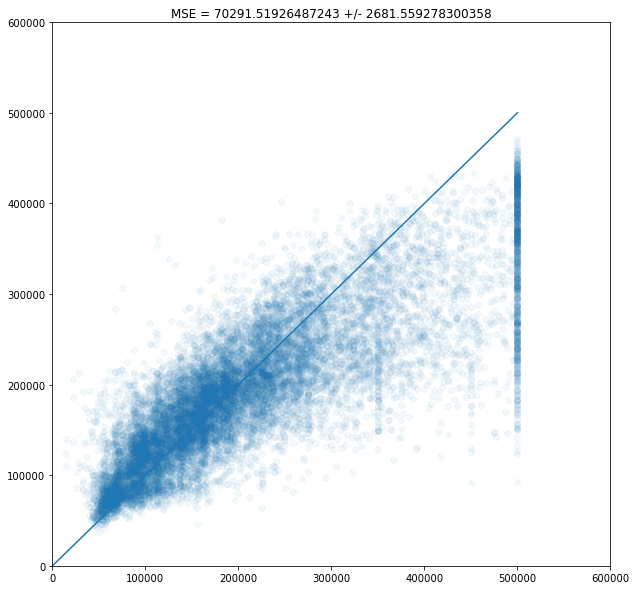

In [18]:
np.random.seed(42)
from sklearn.svm import SVR

evaluate_model(SVR(kernel="rbf", C=1000, gamma="scale"))